# Seeds dataset (Clustering)

## Authors

Written by: Neeraj Asthana (under Professor Robert Brunner)

University of Illinois at Urbana-Champaign

Summer 2016

## Acknowledgements

Dataset found on UCI Machine Learning repository at: https://archive.ics.uci.edu/ml/datasets/seeds

## Dataset Information

This data set tries to cluster seeds (type) using many different continous predcitors.

A description of the dataset can be found at: https://archive.ics.uci.edu/ml/datasets/seeds

Predictors:

- area A
- perimeter P
- compactness C = 4*pi*A/P^2
- length of kernel
- width of kernel
- asymmetry coefficient 
- length of kernel groove

### Imports

In [3]:
#Libraries and Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA

### Reading Data

In [5]:
#Names of all of the columns
names = [
       'area'
    ,  'perimeter'
    ,  'compactness'
    ,  'length'
    ,  'width'
    ,  'asymmetry'
    ,  'groove_length'
    ,  'class'
]

#Import dataset
data = pd.read_csv('seeds_dataset.txt', sep = '\t', header = None, names = names)

data.head(10)

,area,perimeter,compactness,length,width,asymmetry,groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,NaN,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [6]:
data.shape

(210, 8)

### Clean Data

In [7]:
#Fill NaN with the mean of the column
#data_clean=data.applymap(lambda x: np.nan if x == '?' else x).dropna()
data_clean = data.fillna(data.mean())

data_clean.shape

(210, 8)

### Separate Data

In [8]:
#Select Predictor columns
X = data_clean.ix[:,:-1]

#Scale X so that all columns have the same mean and variance
X_scaled = preprocessing.scale(X)

#Select target column
y = data_clean['class']

y.value_counts()

3    70
2    70
1    70
Name: class, dtype: int64

### Scatter Plot Matrix

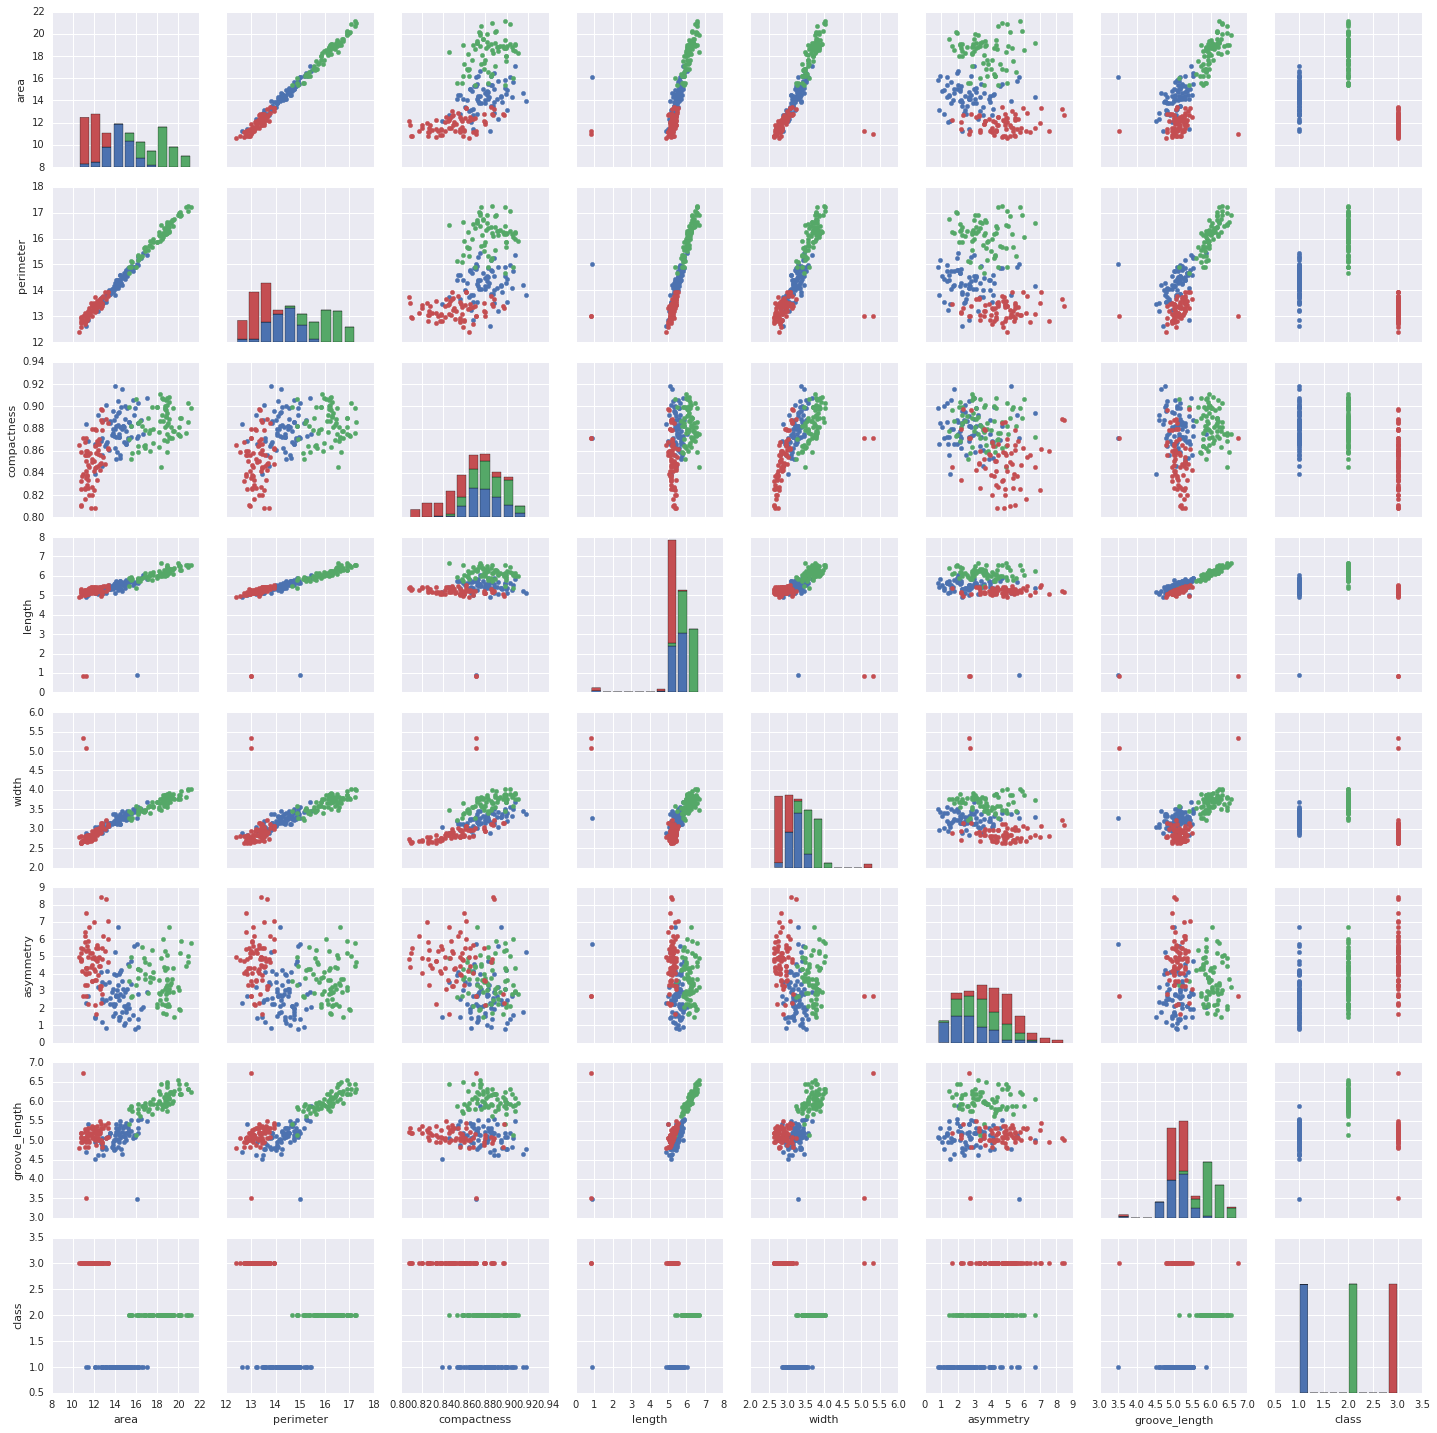

In [9]:
# Visualize dataset with scatterplot matrix
%matplotlib inline

g = sns.PairGrid(data_clean, hue="class")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### K Means (3 clusters)

In [10]:
#train a k-nearest neighbor algorithm
fit = KMeans(n_clusters=3).fit(X_scaled)
fit.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2], dtype=int32)

In [11]:
#remake labels so that they properly matchup with the classes 
labels = fit.labels_[:]
for index,val in enumerate(labels):
    if val == 1:
        labels[index] = 1
    elif val == 2:
        labels[index] = 3
    else:
        labels[index] = 2

labels

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3,
       3, 3, 3], dtype=int32)

In [12]:
conf_mat = np.zeros((3,3))

for i,val in enumerate(y):
    conf_mat[val-1,labels[i]-1] += 1

#true vs. predicted
print(pd.DataFrame(conf_mat))

      0     1     2
0  64.0   2.0   4.0
1   4.0  66.0   0.0
2  10.0   0.0  60.0


### PCA

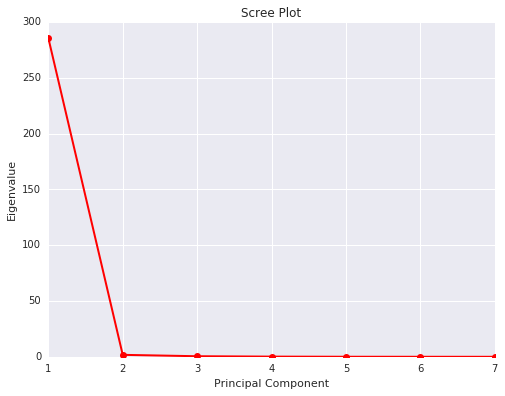

In [15]:
%matplotlib inline
#Scree plot

U, S, V = np.linalg.svd(X)
eigvals = S**2 / np.cumsum(S)[-1]

fig = plt.figure(figsize=(8,6))
sing_vals = np.arange(7) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

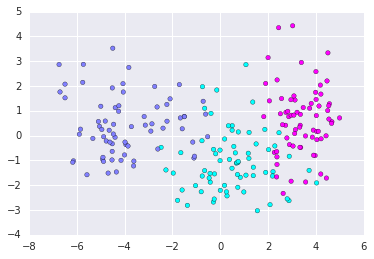

In [27]:
pca = PCA(n_components=2)
pca.fit(X)

X_pca = pca.transform(X)
plt.scatter(X_pca[:,0],X_pca[:,1], c=y, cmap=pylab.cm.cool)

In [28]:
pca_fit = KMeans(n_clusters=3).fit(X_pca)
pca_fit.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [29]:
#remake labels so that they properly matchup with the classes 
pca_labels = pca_fit.labels_[:]
for index,val in enumerate(pca_labels):
    if val == 0:
        pca_labels[index] = 1
    elif val == 1:
        pca_labels[index] = 3
    else:
        pca_labels[index] = 2

labels

pca_conf_mat = np.zeros((3,3))

for i,val in enumerate(y):
    pca_conf_mat[val-1,pca_labels[i]-1] += 1

#true vs. predicted
print(pd.DataFrame(pca_conf_mat))

      0     1     2
0  56.0   1.0  13.0
1  10.0  60.0   0.0
2   0.0   0.0  70.0


## Data Tasks

1. Read in file
    - Different types of separators (',',' ', '\t', '\s', etc.)
    - Specify whether there is a header or not
    - Name different columns
    - Editting values to matchup with columns
    
1. Handle missing values (ex. ?, NA, etc.)
    - remove these examples?
    - replace missing values with the mean or 0

1. Select columns for the regression tasks
    - Select columns I want to use as predictors
    - Select which column I am looking to target and predict

1. Transform columns or variables
    - scaling columns so that their means and variances are equal
    
1. Cluster using K-Means
    - specify number of clusters
    - specify initial cluster locations
    - clustering type (avg, max, min, etc.)

1. Perform diagnostics on the model
    - See cluster centers
    - confusion matrix
    
1. Visualizations
    - Visualize dataset as a whole (scatter plot matrix)
    - See diagnostic plots (t-squared, ccc)